### Neural Networks

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [15]:
def create_dataset():
    np.random.seed(1)
    m = 400 # 数据量
    N = int(m/2) # 每个标签的实例数
    D = 2 # 数据维度
    X = np.zeros((m,D)) # 数据矩阵
    Y = np.zeros((m,1), dtype='uint8') # 标签维度
    a = 4 
    
    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    return X, Y

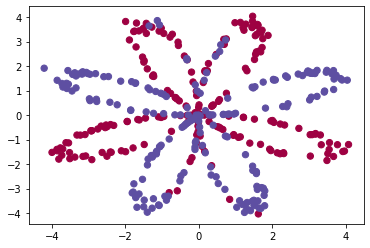

In [16]:
X, Y = create_dataset()
plt.scatter(X.T[0, :], X.T[1, :], c=Y.T[0], s=40, cmap=plt.cm.Spectral)

In [17]:
def layer_sizes(X, Y):
    n_x = X.T.shape[0] # 输入层大小
    n_h = 4 # 隐藏层大小
    n_y = Y.T.shape[0] # 输出层大小
    return (n_x, n_h, n_y)

In [18]:
class MLP:
    
    def __init__(self, in_dim=2, hidden_dim=10, out_dim=1, lr=0.1):
        
        self.scale = 0.01
        self.w1 = np.random.randn(hidden_dim, in_dim) * self.scale
        self.b1 = np.zeros(hidden_dim)
        
        self.w2 = np.random.randn(out_dim, hidden_dim) * self.scale
        self.b2 = np.zeros(out_dim)
        
        self.lr = lr
        
        self.cache = {}
        
    def sigmoid(self, x):
        
        return 1 / (1 + np.exp(-x))
    
    def tanh(self, x):
        
        return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    
    def relu(self, x):
        
        return np.max(0, x)
        
    def forward(self, x):
        z1 = np.dot(x, self.w1.T) + self.b1
        a1 = self.tanh(z1)
        
        z2 = np.dot(a1, self.w2.T) + self.b2
        a2 = self.sigmoid(z2)
        
        self.cache["a1"] = a1
        self.cache["a2"] = a2
        
        return a2
    
    def backward(self, x, y):
        m = x.shape[0]
        
        # 难点是维度的对齐统一
        d_z2 = self.cache["a2"] - y  # m \times 1
        d_w2 = 1/m * np.dot(d_z2.T, self.cache["a1"])
        d_b2 = 1/m * np.sum(d_z2, axis=0, keepdims=False) # m \times 1
        d_z1 = np.dot(d_z2, self.w2) * (self.cache["a1"]- self.cache["a1"]**2)
        d_w1 = 1/m * np.dot(d_z1.T, x)
        d_b1 = 1/m * np.sum(d_z1, axis=0, keepdims=False)
        
        return {
            "d_z2": d_z2,
            "d_w2": d_w2,
            "d_b2": d_b2,
            "d_z1": d_z1,
            "d_w1": d_w1,
            "d_b1": d_b1,
        }
        
    
    def optimize(self, grads: dict):

        self.w1 = self.w1 - self.lr * grads["d_w1"]
        self.b1 = self.b1 - self.lr * grads["d_b1"]
        
        self.w2 = self.w2 - self.lr * grads["d_w2"]
        self.b2 = self.b2 - self.lr * grads["d_b2"]
    
    def cost(self, x, y):
        
        return - (y*np.log(x) + (1-y)*np.log(1-x))
    
    def predict(self, x):
        
        y_hat = np.array(self.forward(x) > 0.5)
        
        return y_hat
        
        
        

In [19]:
model = MLP(lr=1.2)

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3)

for ep in range(1000):
    output = model.forward(trainX)
    loss = model.cost(output, trainY)
    grads = model.backward(trainX, trainY)
    model.optimize(grads)

    print("loss",loss.mean())
    

y_hat = model.predict(trainX)
accuracy = (trainY == y_hat).sum() / len(trainY)
print("train accuracy:", accuracy)

y_hat = model.predict(testX)
accuracy = (testY == y_hat).sum() / len(testY)
print("test accuracy:", accuracy)

loss 0.6931088377603373
loss 0.6926229671310442
loss 0.6923760474568524
loss 0.6922462246452333
loss 0.6921738156599677
loss 0.6921295868340156
loss 0.6920992156950986
loss 0.6920756836329426
loss 0.6920555507179746
loss 0.6920371308297645
loss 0.6920195973410208
loss 0.6920025446876755
loss 0.691985773370548
loss 0.691969184496399
loss 0.6919527280342862
loss 0.6919363774170251
loss 0.6919201170655631
loss 0.6919039362532508
loss 0.6918878260810776
loss 0.6918717779800491
loss 0.6918557829637898
loss 0.6918398312502286
loss 0.6918239120653289
loss 0.6918080135370039
loss 0.6917921226340226
loss 0.6917762251275886
loss 0.6917603055644811
loss 0.6917443472461439
loss 0.6917283322108101
loss 0.6917122412170709
loss 0.691696053727962
loss 0.6916797478949703
loss 0.6916633005415447
loss 0.6916466871457838
loss 0.6916298818220538
loss 0.6916128573013207
loss 0.6915955849100401
loss 0.6915780345474769
loss 0.691560174661378
loss 0.6915419722219672
loss 0.69152339269428
loss 0.691504400008912